# Section 1: Monitoring changes in land cover using satellite images

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('dataset_2.txt', header = None,\
                names = ['x_coord', 'y_coord', 'veg'])
df.head()

,x_coord,y_coord,veg
0,0.266809,0.688130,1.0
1,0.100046,0.520933,1.0
2,0.158702,0.436935,1.0
3,0.174504,0.538224,1.0
4,0.258707,0.615527,1.0


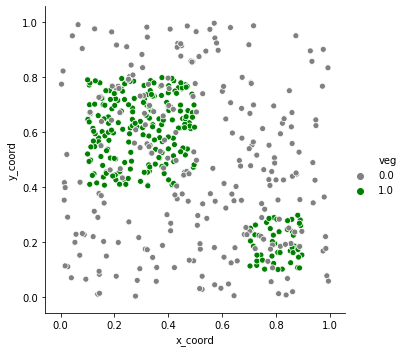

In [3]:
sns.relplot(x='x_coord',y='y_coord',hue='veg', palette=['gray','green'],data=df)

In [4]:
x = df[['x_coord','y_coord']]
y = df[['veg']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
x.head()

,x_coord,y_coord
0,0.266809,0.688130
1,0.100046,0.520933
2,0.158702,0.436935
3,0.174504,0.538224
4,0.258707,0.615527


In [8]:
x_train

,x_coord,y_coord
201,0.706465,0.241877
446,0.382467,0.469789
118,0.106213,0.637393
466,0.025753,0.291154
170,0.446643,0.779922
...,...,...
416,0.169941,0.149447
17,0.376751,0.526206
301,0.080530,0.231702
288,0.274120,0.560530


In [6]:
y.head()

,veg
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [9]:
y_train

,veg
201,1.0
446,0.0
118,1.0
466,0.0
170,1.0
...,...
416,0.0
17,1.0
301,0.0
288,0.0


In [10]:
x_test

,x_coord,y_coord
430,0.565662,0.468666
106,0.169582,0.450532
37,0.259071,0.466142
316,0.945308,0.425561
46,0.279965,0.631356
...,...,...
471,0.399219,0.796962
474,0.016716,0.398659
480,0.993460,0.834487
69,0.445417,0.698849


In [11]:
y_test

,veg
430,0.0
106,1.0
37,1.0
316,0.0
46,1.0
...,...
471,0.0
474,0.0
480,0.0
69,1.0


# Section 2: Decision Tree Classifiers

In [12]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_test_preds = tree.predict(x_test)

In [14]:
confusion_matrix(y_test , y_test_preds)

array([[41, 15],
       [ 1, 43]], dtype=int64)

# Section 3: Understanding decision trees through Visualization

In [15]:
def scatter_plot_data(x_df, y_series, ax):
    '''
    scatter_plot_data scatter plots the satellite data. A point in the plot is colored 'green' if 
    vegetation is present and 'gray' otherwise.
    
    input:
       x_df - a DataFrame of size N x 2, each row is a location, each column is a coordinate
       y_series - a Series of length N, each entry is either 0 (no vegetation) or 1 (vegetation)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    
    # convert x_df and y_series into numpy arrays
    x = x_df.values
    y = y_series.values
    
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='green', label='vegetation')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='gray', label='nonvegetation')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x_df, y_series, model, ax, plot_boundary_only=False):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x_df - a DataFrame of size N x 2, each row is a location, each column is a coordinate
       y_series - a Series of length N, each entry is either 0 (non-vegetation) or 1 (vegetation)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
    returns: 
       ax - the axis with the scatter plot
    
    '''
    
    # convert x_df and y_series into numpy arrays
    x = x_df.values
    y = y_series.values
    
    # Plot data
    if not plot_boundary_only:
        ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='green', label='vegetation')
        ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='gray', label='non-vegetation')
    
    # Create mesh
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)
    
    # Predict on mesh points
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if not plot_boundary_only:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    ax.contour(x1, x2, yy, colors='black', linewidths=0.1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

IndexError: too many indices for array

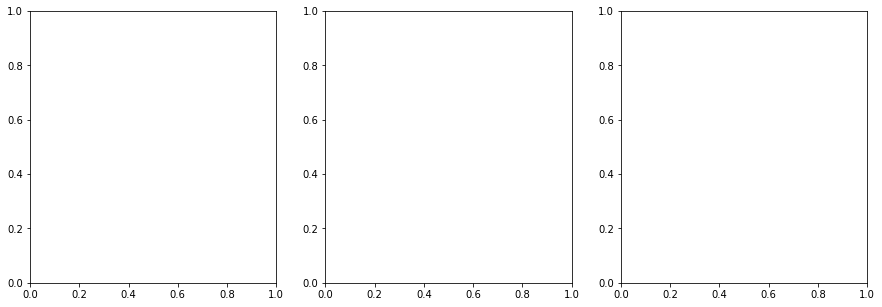

In [16]:
# set up to create two plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and decision tree boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, tree, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and decision tree boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, tree, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

IndexError: too many indices for array

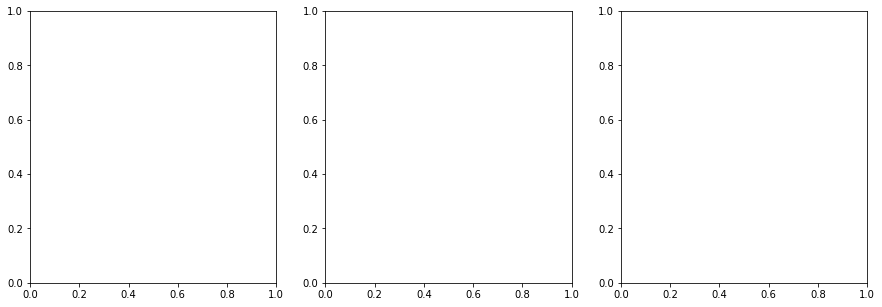

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

tree1 = DecisionTreeClassifier(max_depth = 1)
tree1.fit(x_train,y_train)

# set up to create three plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and decision tree boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, tree1, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')


#  plot the test data and decision tree boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, tree1, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

# Section 4: Random Forests

IndexError: too many indices for array

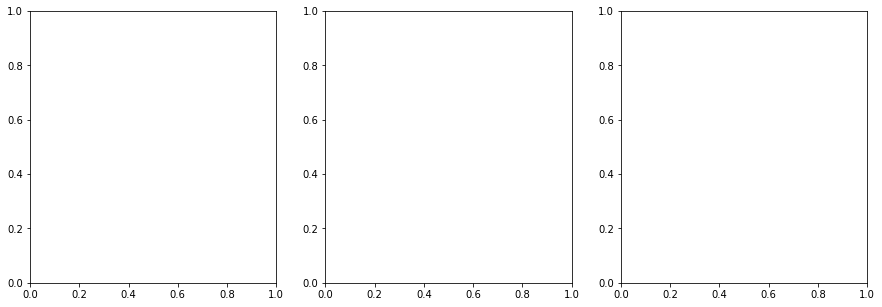

In [18]:
# Take a random sample with replacement
indices = np.arange(x_train.shape[0])
sampled_indices = np.random.choice(indices, x_train.shape[0])
x_sample = x_train.iloc[sampled_indices]
y_sample = y_train.iloc[sampled_indices]

tree100 = DecisionTreeClassifier(max_depth = 100)
tree100.fit(x_sample, y_sample)

#Set up to create three plots in the same image
fig, ax = plt.subplots( 1, 3, figsize = (15, 5))

#Visualize the data on the first plot (ax[0])
scatter_plot_data(x_sample, y_sample, ax[0])
ax[0].set_title('Training Data')

# plot the training data and decision tree boundary on the second plot (ax[1])
plot_decision_boundary(x_sample, y_sample, tree100, ax[1])
ax[1].set_title('Decision Boundary on the Training Date')

# plot the test data and decision tree boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, tree100, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

In [19]:
y_test_pred100 = tree100.predict(x_test)

In [20]:
confusion_matrix(y_test, y_test_pred100)

array([[41, 11],
       [19, 29]], dtype=int64)

In [21]:
rf = RandomForestClassifier(n_estimators = 500, max_depth = 100)
rf.fit(x_train, y_train)

C:\Users\Chiqui\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_test_pred_rf = rf.predict(x_test)

In [23]:
confusion_matrix(y_test, y_test_pred_rf)

array([[41, 11],
       [12, 36]], dtype=int64)

IndexError: too many indices for array

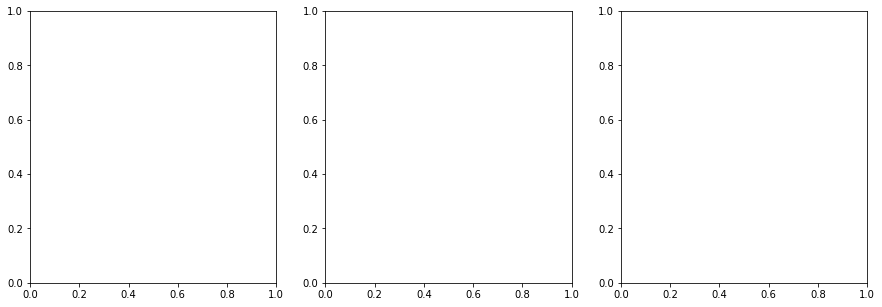

In [24]:
# Set up to create three plots in the same image
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

# Visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

# Plot the training data and decision tree boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, rf, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

# Plot the test data and decision tree boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, rf, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')